# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key savefig.frameon in file /Users/surajshrestha/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/surajshrestha/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/surajshrestha/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.std

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAP_BOX_API")
type(map_box_api)

str

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
to_data_clean = to_data.drop(columns=['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'])
to_data_clean.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  
year                                                               
2001       1295     195                          185            5  
2001        455     105                          425            0  
2001         50     185                          370            0  
2001        605     275                         3710          165  
2001        380      15                         1360            0

In [5]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
housing_units = to_data_clean.groupby('year').sum()
housing_units.head()

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [6]:
# Save the dataframe as a csv file
housing_units.to_csv('sum_of_housing_units.csv')

In [7]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color, xlabel = xlabel, ylabel = ylabel,  title = title)
    plt.show()
    plt.close(fig)
    

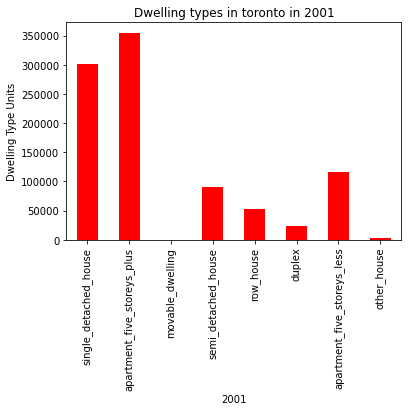

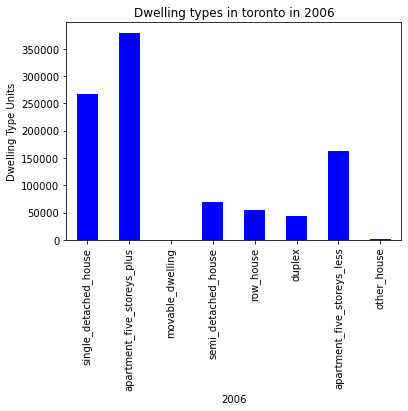

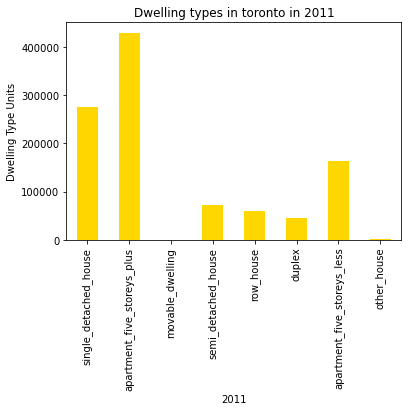

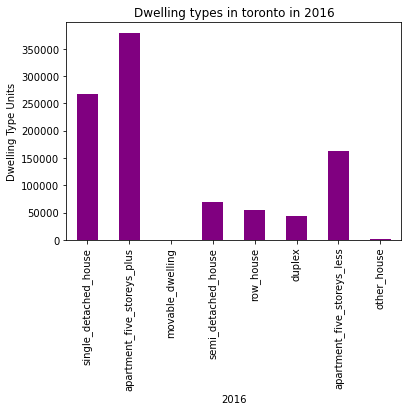

In [8]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(housing_units.loc[2001], 'Dwelling types in toronto in 2001', '2001', 'Dwelling Type Units','red')

# Bar chart for 2006
create_bar_chart(housing_units.loc[2006], 'Dwelling types in toronto in 2006', '2006', 'Dwelling Type Units','blue')

# Bar chart for 2011
create_bar_chart(housing_units.loc[2011], 'Dwelling types in toronto in 2011', '2011', 'Dwelling Type Units','gold')

# Bar chart for 2016
create_bar_chart(housing_units.loc[2006], 'Dwelling types in toronto in 2016', '2016', 'Dwelling Type Units','purple')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average monthly shelter costs for owned and rented dwellings
to_data_clean2 = pd.DataFrame().assign(shelter_costs_owned = to_data['shelter_costs_owned'],shelter_costs_rented= to_data['shelter_costs_rented'])
avg_df = to_data_clean2.groupby('year').mean()
avg_df

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [10]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    line_fig = plt.figure()
    line_chart = data.plot.line(color = color, xlabel =xlabel, ylabel = ylabel, title = title, )
    plt.show()
    plt.close(line_fig)

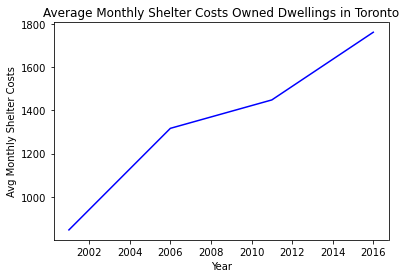

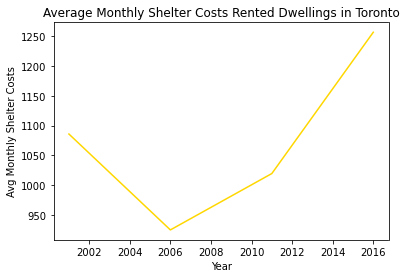

In [11]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(avg_df['shelter_costs_owned'], 'Average Monthly Shelter Costs Owned Dwellings in Toronto', 'Year', 'Avg Monthly Shelter Costs', 'blue')

# Line chart for rented dwellings
create_line_chart(avg_df['shelter_costs_rented'], 'Average Monthly Shelter Costs Rented Dwellings in Toronto', 'Year', 'Avg Monthly Shelter Costs', 'gold')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [12]:
# Calculate the average house value per year
avg_house = pd.DataFrame().assign(average_house_value = to_data['average_house_value']) 
avg_house_df = avg_house.groupby('year').mean()
avg_house_df


average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

<AxesSubplot:title={'center':'Average House Value in Toronto'}, xlabel='Year', ylabel='Avg House Value'>

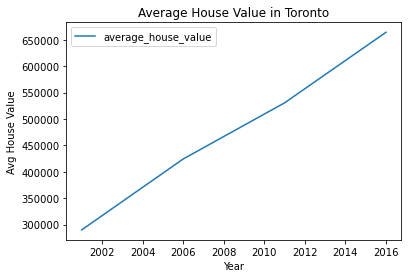

In [13]:
# Plot the average house value per year as a line chart
avg_house_df.plot.line(xlabel='Year', ylabel= 'Avg House Value', title = 'Average House Value in Toronto')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [14]:
# Create a new DataFrame with the mean house values by neighbourhood per year
neighbourhood_df = pd.DataFrame().assign(neighbourhood = to_data['neighbourhood'], average_house_value = to_data['average_house_value'])
neighbourhood_df.reset_index(inplace=True)
neighbourhood_df.head(10)


year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864
5  2001                Bathurst Manor               304749
6  2001           Bay Street Corridor               257404
7  2001               Bayview Village               327644
8  2001         Bayview Woods-Steeles               343535
9  2001          Bedford Park-Nortown               565304

In [15]:
%pip install jupyter_bokeh

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
neighbourhood_plot = neighbourhood_df.hvplot.line(x= 'year', y= 'average_house_value', groupby = 'neighbourhood' )
neighbourhood_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'c79dc95e-4cf2-4d14-a0b9-dbe00879b29d': {'defs': …

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [17]:
# Fetch the data of all dwelling types per year
all_dwelling_df = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
all_dwelling_df.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  
year                                                               
2001       1295     195                          185            5  
2001        455     105                          425            0  
2001         50     185                          370            0  
2001        605     275                         3710          165  
2001        380      15                         1360            0

In [18]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
all_dwelling_plot = all_dwelling_df.hvplot(xlabel= 'Year',ylabel= 'Dwelling Type Units', rot= 90,height=600, groupby = 'neighbourhood', kind = 'bar' )
all_dwelling_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'99eb02bc-bfaa-4eb4-8c5b-1d2fcc24d3e9': {'defs': …

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [19]:
# Getting the data from the top 10 expensive neighbourhoods
expensive_neighbourhoods = to_data.groupby(by="neighbourhood").mean()
expensive_neighbourhoods = expensive_neighbourhoods.sort_values(by = 'average_house_value', ascending=False).head(10)
expensive_neighbourhoods = expensive_neighbourhoods.reset_index()
expensive_neighbourhoods

neighbourhood  single_detached_house  \
0  Bridle Path-Sunnybrook-York Mills                2260.00   
1                  Forest Hill South                1742.50   
2                Lawrence Park South                3472.50   
3                Rosedale-Moore Park                2498.75   
4               St.Andrew-Windfields                3225.00   
5                          Casa Loma                 916.25   
6               Bedford Park-Nortown                4865.00   
7                  Forest Hill North                1488.75   
8                     Kingsway South                2326.25   
9                     Yonge-St.Clair                 565.00   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                       331.25              0.00                36.25   
1                      2031.25              1.25                61.25   
2                       773.75              0.00               126.25   
3                      4641.25              0.00               486.25   
4                      1670.00              0.00               185.00   
5                      2310.00              0.00               288.75   
6                      1981.25              0.00                43.75   
7                      3392.50              0.00                12.50   
8                       576.25              0.00                66.25   
9                      3948.75              0.00               425.00   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0      90.00    25.0                        40.00         0.00   
1      45.00    75.0                      1027.50         3.75   
2      38.75   225.0                       966.25        16.25   
3     245.00   327.5                      1618.75         2.50   
4     552.50    97.5                       586.25         5.00   
5     201.25   162.5                      1192.50         2.50   
6      57.50   287.5                      1275.00        88.75   
7      16.25    82.5                       402.50         1.25   
8      48.75    20.0                       336.25         2.50   
9     212.50   172.5                      1308.75         6.25   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0           1526485.75              2360.75               2321.75  
1           1195992.50              1781.00               1313.75  
2           1094027.75              1954.00               1372.75  
3           1093640.00              1909.75               1537.25  
4            999107.00              1880.25               1384.50  
5            981064.25              1873.75               1547.75  
6            930415.25              1786.75               1255.00  
7            851680.50              1722.75               1245.50  
8            843234.25              1736.75               1622.00  
9            813220.25              1680.75               1369.00

In [20]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_plot = expensive_neighbourhoods.hvplot(
    'neighbourhood',
    'average_house_value',
    title = 'Top 10 Expensive Neighbourhoods in Toronto',
    xlabel = 'Neighbourhood',
    ylabel = 'Avg. House Value',
    height = 500,
    rot= 90,
    kind = 'bar',
    ylim = (0,1600000)
)
top_10_plot

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [21]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [22]:
# Calculate the mean values for each neighborhood
df_mean_neighbourhood = to_data.groupby('neighbourhood').mean()
df_mean_neighbourhood.head()

single_detached_house  \
neighbourhood                                         
Agincourt North                             3435.00   
Agincourt South-Malvern West                2897.50   
Alderwood                                   2903.75   
Annex                                        751.25   
Banbury-Don Mills                           3572.50   

                              apartment_five_storeys_plus  movable_dwelling  \
neighbourhood                                                                 
Agincourt North                                   1947.50              2.50   
Agincourt South-Malvern West                      2180.00              1.25   
Alderwood                                          302.50              1.25   
Annex                                             7235.00              1.25   
Banbury-Don Mills                                 5388.75              1.25   

                              semi_detached_house  row_house  duplex  \
neighbourhood                                                          
Agincourt North                            863.75    1406.25  512.50   
Agincourt South-Malvern West               375.00     456.25  523.75   
Alderwood                                  503.75      76.25  302.50   
Annex                                     1375.00     613.75  355.00   
Banbury-Don Mills                          273.75     626.25   32.50   

                              apartment_five_storeys_less  other_house  \
neighbourhood                                                            
Agincourt North                                    547.50        10.00   
Agincourt South-Malvern West                       628.75        32.50   
Alderwood                                          502.50         1.25   
Annex                                             4605.00        83.75   
Banbury-Don Mills                                 1340.00         0.00   

                              average_house_value  shelter_costs_owned  \
neighbourhood                                                            
Agincourt North                          329811.5              1109.00   
Agincourt South-Malvern West             334189.0              1131.25   
Alderwood                                427922.5              1166.75   
Annex                                    746977.0              1692.75   
Banbury-Don Mills                        612039.0              1463.50   

                              shelter_costs_rented  
neighbourhood                                       
Agincourt North                             983.50  
Agincourt South-Malvern West                985.00  
Alderwood                                  1003.25  
Annex                                      1315.25  
Banbury-Don Mills                          1242.75

In [23]:
# Join the average values with the neighbourhood locations
df_all_neighbourhood_locations = pd.merge(df_neighbourhood_locations, df_mean_neighbourhood, on = 'neighbourhood')
df_all_neighbourhood_locations.head()

neighbourhood        lat        lon  single_detached_house  \
0               Agincourt North  43.805441 -79.266712                3435.00   
1  Agincourt South-Malvern West  43.788658 -79.265612                2897.50   
2                     Alderwood  43.604937 -79.541611                2903.75   
3                         Annex  43.671585 -79.404001                 751.25   
4             Banbury-Don Mills  43.737657 -79.349718                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

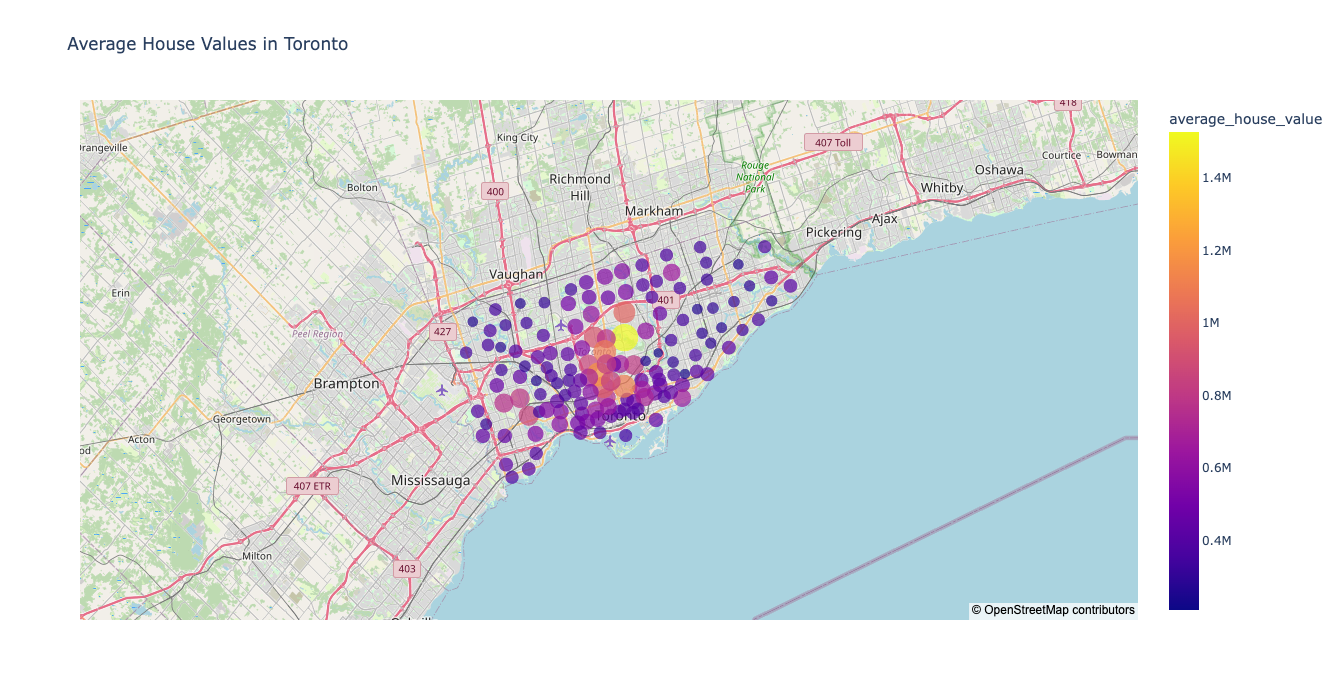

In [24]:
# Create a scatter mapbox to analyze neighbourhood info
map_plot = px.scatter_mapbox(
    df_all_neighbourhood_locations,
    lat = 'lat',
    lon= 'lon',
    size = 'average_house_value',
    color = 'average_house_value',
    title= 'Average House Values in Toronto',
    zoom= 9
    

)
map_plot.update_layout(mapbox_style = 'open-street-map',autosize = False, height = 700, width = 1200)

#Display the map
map_plot.show()


- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [25]:
df_avg_house_values = to_data[['average_house_value','neighbourhood']]
df_avg_house_values.reset_index(inplace= True)
df_avg_house_values.head()

year  average_house_value                 neighbourhood
0  2001               200388               Agincourt North
1  2001               203047  Agincourt South-Malvern West
2  2001               259998                     Alderwood
3  2001               453850                         Annex
4  2001               371864             Banbury-Don Mills

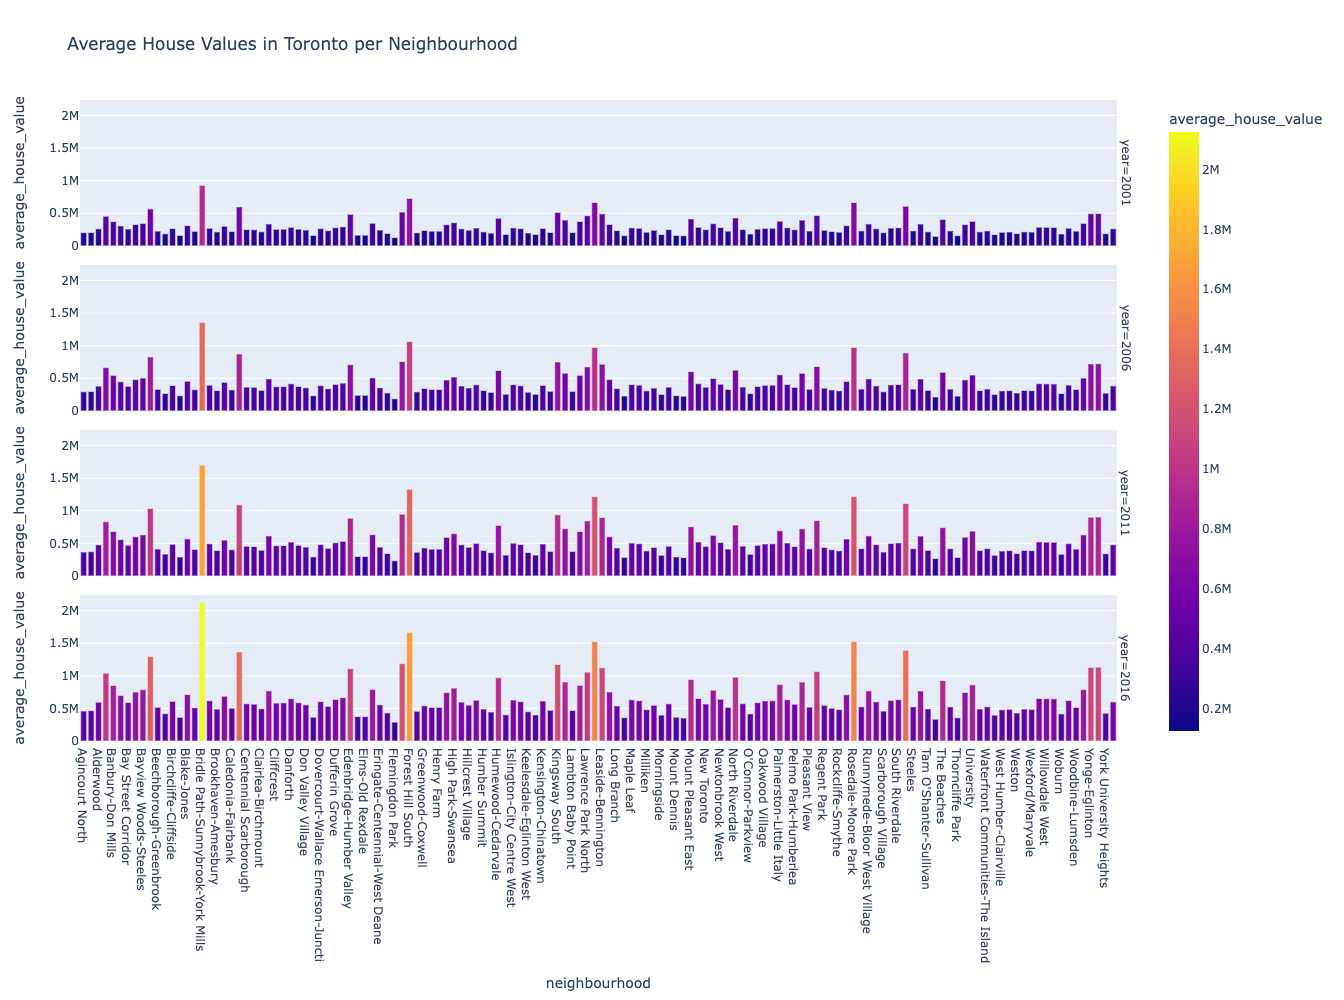

In [26]:
bar_chart = px.bar(
    df_avg_house_values,
    x = 'neighbourhood',
    y = 'average_house_value',
    facet_row= 'year',
    color = 'average_house_value',
    height= 1000, 
    width= 1000,
    title= 'Average House Values in Toronto per Neighbourhood'

)

bar_chart.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [27]:
# Fetch the data from all expensive neighbourhoods per year.
all_expensive_neighbourhood = to_data[to_data['neighbourhood'].isin(expensive_neighbourhoods['neighbourhood'])]
all_expensive_neighbourhood = all_expensive_neighbourhood.reset_index()
all_expensive_neighbourhood

year                      neighbourhood  single_detached_house  \
0   2001               Bedford Park-Nortown                   4985   
1   2001  Bridle Path-Sunnybrook-York Mills                   2275   
2   2001                          Casa Loma                   1035   
3   2001                  Forest Hill North                   1565   
4   2001                  Forest Hill South                   1815   
5   2001                     Kingsway South                   2370   
6   2001                Lawrence Park South                   3590   
7   2001                Rosedale-Moore Park                   2610   
8   2001               St.Andrew-Windfields                   3275   
9   2001                     Yonge-St.Clair                    670   
10  2006               Bedford Park-Nortown                   4785   
11  2006  Bridle Path-Sunnybrook-York Mills                   2205   
12  2006                          Casa Loma                    875   
13  2006                  Forest Hill North                   1450   
14  2006                  Forest Hill South                   1740   
15  2006                     Kingsway South                   2275   
16  2006                Lawrence Park South                   3415   
17  2006                Rosedale-Moore Park                   2450   
18  2006               St.Andrew-Windfields                   3095   
19  2006                     Yonge-St.Clair                    540   
20  2011               Bedford Park-Nortown                   4870   
21  2011  Bridle Path-Sunnybrook-York Mills                   2285   
22  2011                          Casa Loma                    880   
23  2011                  Forest Hill North                   1470   
24  2011                  Forest Hill South                   1730   
25  2011                     Kingsway South                   2350   
26  2011                Lawrence Park South                   3465   
27  2011                Rosedale-Moore Park                   2485   
28  2011               St.Andrew-Windfields                   3285   
29  2011                     Yonge-St.Clair                    530   
30  2016               Bedford Park-Nortown                   4820   
31  2016  Bridle Path-Sunnybrook-York Mills                   2275   
32  2016                          Casa Loma                    875   
33  2016                  Forest Hill North                   1470   
34  2016                  Forest Hill South                   1685   
35  2016                     Kingsway South                   2310   
36  2016                Lawrence Park South                   3420   
37  2016                Rosedale-Moore Park                   2450   
38  2016               St.Andrew-Windfields                   3245   
39  2016                     Yonge-St.Clair                    520   

    apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                          2080                 0                   45   
1                           110                 0                   25   
2                          1700                 0                  415   
3                          3380                 0                   10   
4                          2440                 5                   65   
5                           260                 0                   65   
6                           570                 0                  170   
7                          3880                 0                  520   
8                          1455                 0                  220   
9                          3625                 0                  410   
10                         1890                 0                   45   
11                          145                 0                   35   
12                         2230                 0                  230   
13                         3410                 0                   10   
14                     

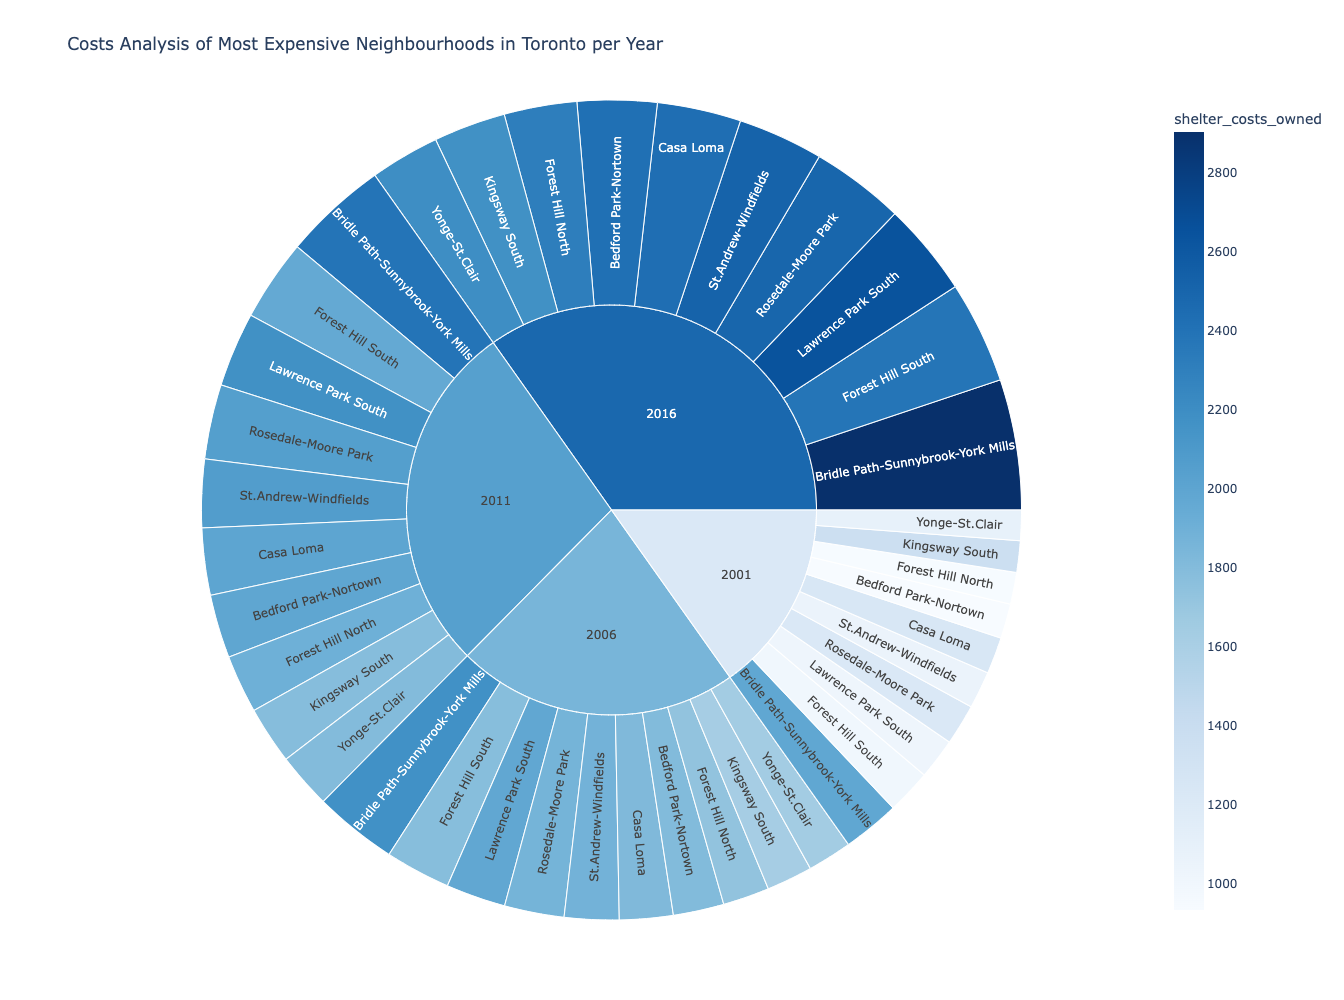

In [28]:
# Create the sunburst chart
sunburst = px.sunburst(
    all_expensive_neighbourhood,
    path= ['year', 'neighbourhood'],
    values= 'average_house_value',
    color= 'shelter_costs_owned',
    hover_data= ['shelter_costs_owned', 'shelter_costs_rented'],
    color_continuous_scale= 'Blues',
    title = "Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year",
    height= 1000,
    width = 1000

)

sunburst.show()